## Preprocess raw data from photocell 

### Import library and data file

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

data_dir = r'C:\Users\farao\Documents\photocell\photocell_data'
# filename = '30hz_ipad.txt'
# filename = 'debugging_stimuli_30hz.txt'
filename = 'NX_stim_test.txt' 
file_path = os.path.join(data_dir, filename)
print(f"Reading from: {file_path}")

try:
    with open(file_path, 'r') as file:
        raw_data = file.readlines()  
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found.")

Reading from: C:\Users\farao\Documents\photocell\photocell_data\NX_stim_test.txt


In [8]:
# Extract photocell value to signal
from scipy.signal import windows
signal = []
for i in raw_data:
    raw = i.split(",")
    if len(raw) == 2:
        raw = raw[1].split("\n")
        # print(raw)
        if raw[0] != '':
            signal.append(int(raw[0]))
# signal
        

In [9]:
len(signal)

205681

### Plot photocell value with respect to time

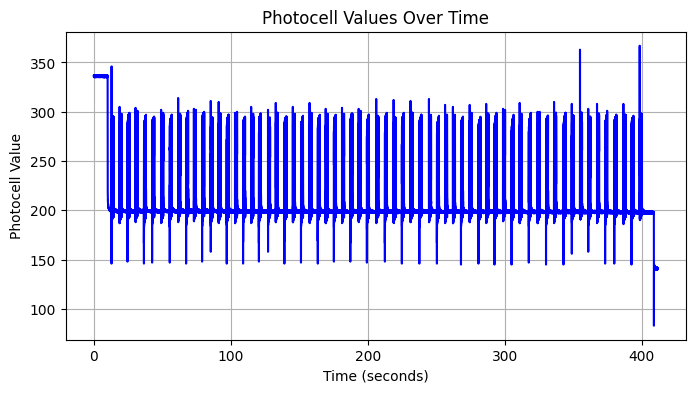

In [10]:
sampling_frequency = 500  

time_values = [i / sampling_frequency for i in range(len(signal))]
plt.figure(figsize=(8, 4))
plt.plot(time_values, signal, linestyle='-', marker='', color='blue')

plt.title("Photocell Values Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Photocell Value")
plt.grid(True)
plt.show()


In [11]:
def sec_2_step(time_second):
    return time_second*500

def find_dominant_freq(signal_begin, sampling_frequency):
    
    signal_samp = signal[signal_begin:signal_begin+500]
    # sampling_frequency = 500  
    time_values = [i / sampling_frequency for i in range(len(signal_samp))]

    # FFT
    fft_result = np.fft.fft(signal_samp)
    frequencies = np.fft.fftfreq(len(signal_samp), 1 / sampling_frequency)
    magnitude = np.abs(fft_result) / len(signal_samp)

    # Only keep the positive half of the frequencies
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_magnitude = magnitude[:len(magnitude)//2]

    n = 1  # Start frequency
    m = 200  # End frequency

    # Mask to filter frequencies within range [n, m]
    mask = (positive_frequencies >= n) & (positive_frequencies <= m)

    # Apply the mask
    filtered_frequencies = positive_frequencies[mask]
    filtered_magnitude = positive_magnitude[mask]

    # Check filtered frequency is not Empty array
    if filtered_frequencies.size > 0:
        # Find the peak frequency
        peak_frequency = filtered_frequencies[np.argmax(filtered_magnitude)]
        peak_magnitude = np.max(filtered_magnitude)

        plt.figure(figsize=(8, 4))
        plt.plot(filtered_frequencies, filtered_magnitude, linestyle='-', color='blue')
        plt.title(f"Frequency Spectrum ({n}-{m} Hz)")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()
        print("Dominant Frequency : ",peak_frequency)
    else:
        print("No frequencies found in the specified range.")
        
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(time_values, signal_samp, linestyle='-', marker='', color='blue')
    plt.title("Photocell Values Over Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Photocell Value")
    plt.grid(True)
    plt.show()

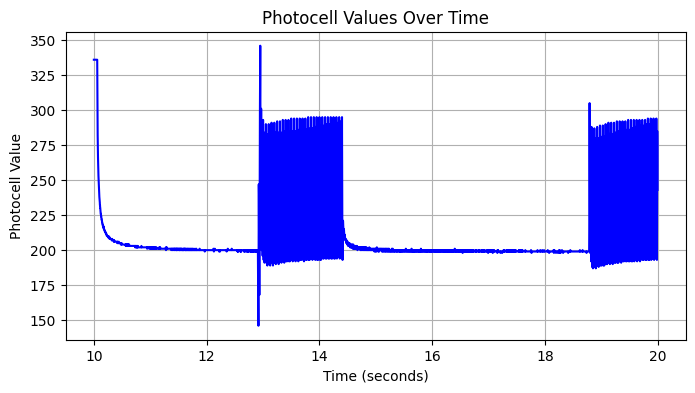

In [12]:
start_time = sec_2_step(10)
end_time = sec_2_step(20)

plt.figure(figsize=(8, 4))
plt.plot(time_values[start_time:end_time], signal[start_time:end_time], linestyle='-', marker='', color='blue')
# plt.plot(time_values, signal, linestyle='-', marker='', color='blue')

plt.title("Photocell Values Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Photocell Value")
plt.grid(True)
plt.show()


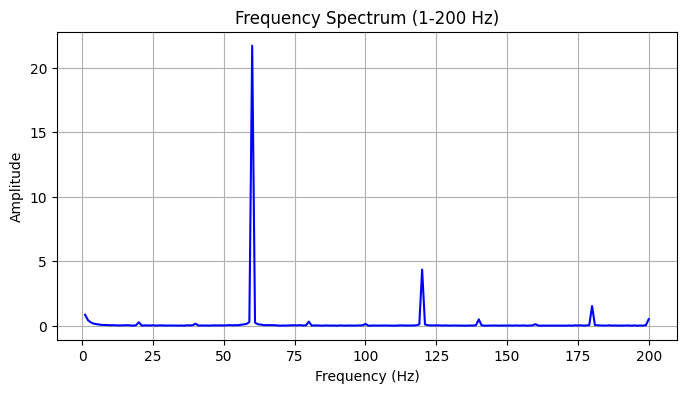

Dominant Frequency :  60.0


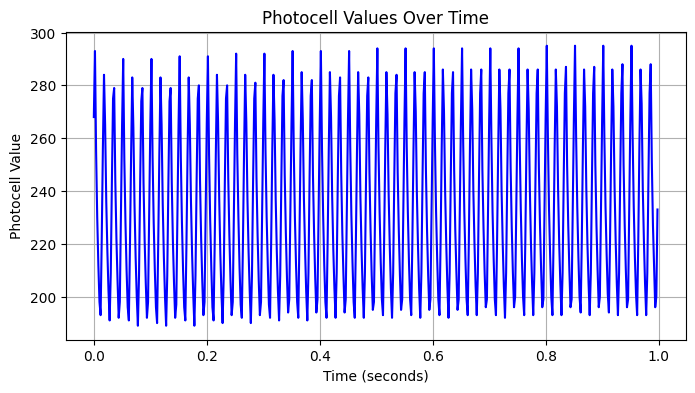

In [13]:
find_dominant_freq(signal_begin=6500,sampling_frequency= 500)


No frequencies found in the specified range.
No frequencies found in the specified range.
No frequencies found in the specified range.
No frequencies found in the specified range.


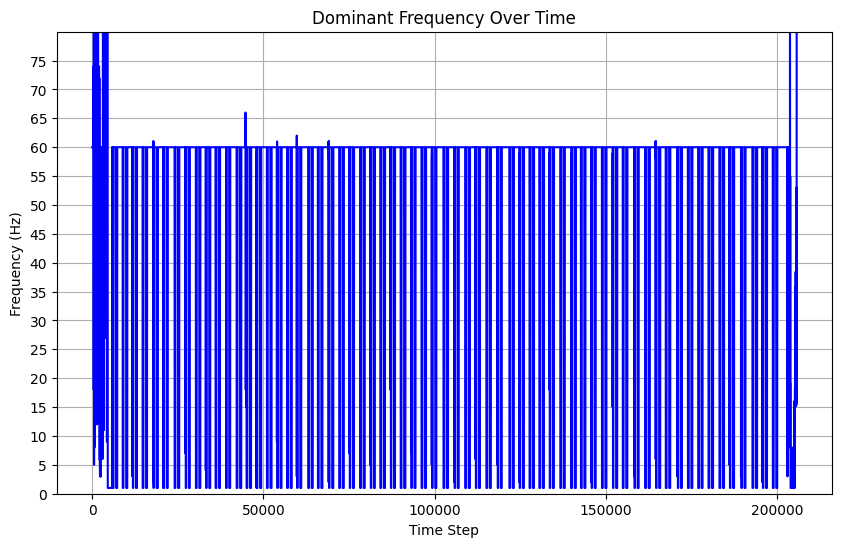

In [14]:
temp = []
window_size = 500
frequency_mask = [1, 100]

for i in range(len(signal)):
    samp_signal = (signal[i: i+window_size])
    # FFT
    fft_result = np.fft.fft(samp_signal)
    frequencies = np.fft.fftfreq(len(samp_signal), 1 / sampling_frequency)
    magnitude = np.abs(fft_result) / len(samp_signal)
    
    # Only keep the positive half of the frequencies
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_magnitude = magnitude[:len(magnitude)//2]
    
    # Mask to filter frequencies within range [n, m]
    mask = (positive_frequencies >= frequency_mask[0]) & (positive_frequencies <= frequency_mask[1])

    # Apply the mask
    filtered_frequencies = positive_frequencies[mask]
    filtered_magnitude = positive_magnitude[mask]

    # Check filtered frequency is not Empty array
    if filtered_frequencies.size > 0:
        peak_frequency = filtered_frequencies[np.argmax(filtered_magnitude)]
        peak_magnitude = np.max(filtered_magnitude)
        temp.append(peak_frequency)
        # print("Dominant Frequency : ",peak_frequency)
    else:
        print("No frequencies found in the specified range.")
    
time_steps = np.arange(len(temp))

# Plot the data in temp with time steps
plt.figure(figsize=(10, 6))
plt.plot(time_steps, temp, linestyle='-', color='blue')
plt.title('Dominant Frequency Over Time')
plt.xlabel('Time Step')
plt.ylabel('Frequency (Hz)')
plt.yticks(np.arange(0,80,5))
plt.ylim(0,80)
plt.grid(True)
plt.show()

No frequencies found in the specified range.
No frequencies found in the specified range.
No frequencies found in the specified range.
No frequencies found in the specified range.


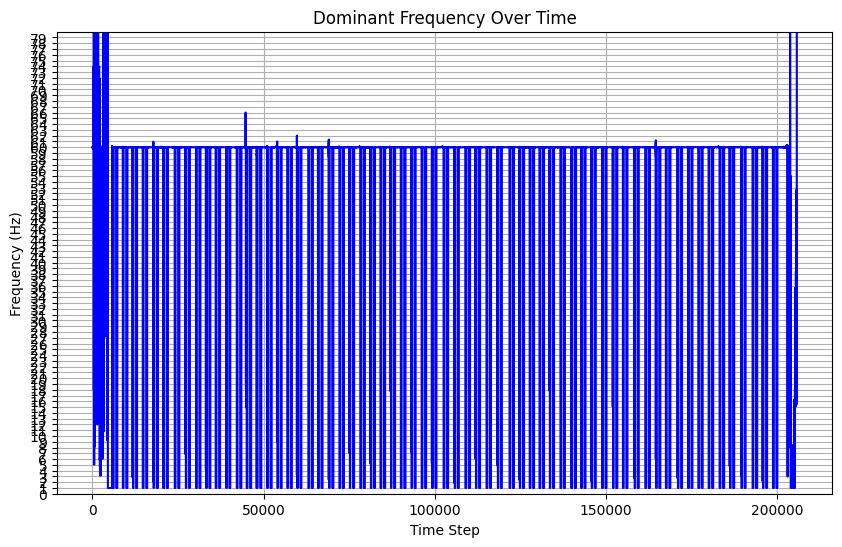

In [16]:
temp = []
window_size = 500
frequency_mask = [1, 100]

for i in range(0, len(signal)):  # Process signal in steps of window_size
    samp_signal = signal[i: i + window_size]
    
    # FFT
    fft_result = np.fft.fft(samp_signal)
    frequencies = np.fft.fftfreq(len(samp_signal), 1 / sampling_frequency)
    magnitude = np.abs(fft_result) / len(samp_signal)
    
    # Only keep the positive half of the frequencies
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_magnitude = magnitude[:len(magnitude)//2]
    
    # Mask to filter frequencies within range [n, m]
    mask = (positive_frequencies >= frequency_mask[0]) & (positive_frequencies <= frequency_mask[1])

    # Apply the mask
    filtered_frequencies = positive_frequencies[mask]
    filtered_magnitude = positive_magnitude[mask]

    # Check if filtered frequency is not empty
    if filtered_frequencies.size > 0:
        # Get the index of the maximum magnitude
        peak_index = np.argmax(filtered_magnitude)
        
        # If peak is not at the boundaries, apply parabolic interpolation
        if 0 < peak_index < len(filtered_magnitude) - 1:
            alpha = filtered_magnitude[peak_index - 1]
            beta = filtered_magnitude[peak_index]
            gamma = filtered_magnitude[peak_index + 1]
            
            # Parabolic interpolation formula
            offset = 0.5 * (alpha - gamma) / (alpha - 2 * beta + gamma)
            
            # True peak frequency with sub-bin precision
            peak_frequency = filtered_frequencies[peak_index] + offset
        else:
            # Use integer frequency if at boundary
            peak_frequency = filtered_frequencies[peak_index]
        
        # Get the peak magnitude
        peak_magnitude = filtered_magnitude[peak_index]
        
        # Save the floating-point peak frequency
        temp.append(peak_frequency)
        # print("Dominant Frequency:", peak_frequency)
    else:
        print("No frequencies found in the specified range.")
        
time_steps = np.arange(len(temp))

# Plot the data in temp with time steps
plt.figure(figsize=(10, 6))
plt.plot(time_steps, temp, linestyle='-', color='blue')
plt.title('Dominant Frequency Over Time')
plt.xlabel('Time Step')
plt.ylabel('Frequency (Hz)')
plt.yticks(np.arange(0,80,1))
plt.ylim(0,80)
plt.grid(True)
